In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#load and read the given image

input_image = cv2.imread(r"/home/snucse/Test-slanted.jpg", cv2.IMREAD_GRAYSCALE)

## Q1. A) Generate noisy images by adding Uniform, Gaussian, Salt and pepper noise to an input image.

In [16]:
#uniform noise

def uniform(image, intensity):
    noise = np.random.uniform(low=-intensity, high=intensity, size=image.shape)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

In [17]:
#gaussian noise

def gaussian(image, mean, stddev):
    noise = np.random.normal(loc=mean, scale=stddev, size=image.shape)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

In [18]:
#salt & pepper noise

def salt_and_pepper(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    salt = np.random.random(image.shape) < salt_prob
    pepper = np.random.random(image.shape) < pepper_prob
    noisy_image[salt] = 255
    noisy_image[pepper] = 0
    return noisy_image

In [19]:
#Adding noise to the input image

uni_img = uniform(input_image, intensity=50)
gaus_img = gaussian(input_image, mean=0, stddev=25)
sp_img = salt_and_pepper(input_image, salt_prob=0.01, pepper_prob=0.01)

Text(0.5, 1.0, 'Salt & Pepper Noise')

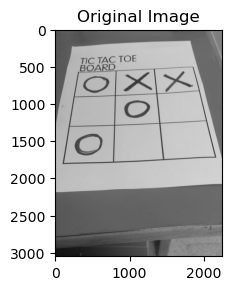

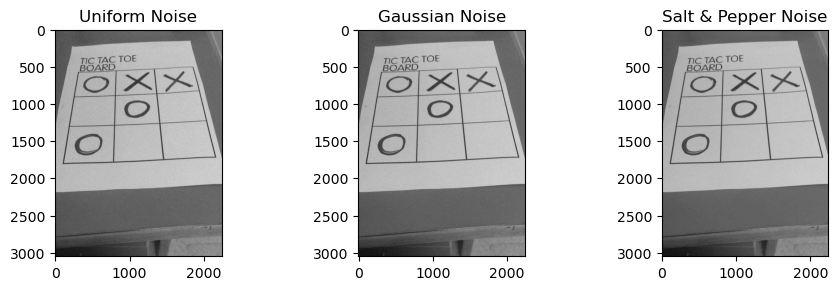

In [20]:
#Display the results

plt.figure(figsize=(15, 10))

plt.subplot(3, 4, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')

plt.figure(figsize=(15, 10))

plt.subplot(3, 4, 2)
plt.imshow(uni_img, cmap='gray')
plt.title('Uniform Noise')

plt.subplot(3, 4, 3)
plt.imshow(gaus_img, cmap='gray')
plt.title('Gaussian Noise')

plt.subplot(3, 4, 4)
plt.imshow(sp_img, cmap='gray')
plt.title('Salt & Pepper Noise')

## Q1. B) Observe the performance of smoothing filters in the spatial domain.

In [21]:
#spatial smoothing filters; BLUR, MEDIAN, GAUSSIAN

def smoothing(image, filter_type, kernel_size):
    if filter_type == 'blur':
        smoothed_image = cv2.blur(image, (kernel_size, kernel_size))
    elif filter_type == 'median':
        smoothed_image = cv2.medianBlur(image, kernel_size)
    elif filter_type == 'gaussian':
        smoothed_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    return smoothed_image

In [25]:
#Applying smoothing filters accordingly

kernel_size = 5
sm_uni = smoothing(uni_img, 'blur', kernel_size)
sm_gaus = smoothing(gaus_img, 'median', kernel_size)
sm_sp = smoothing(sp_img, 'gaussian', kernel_size)

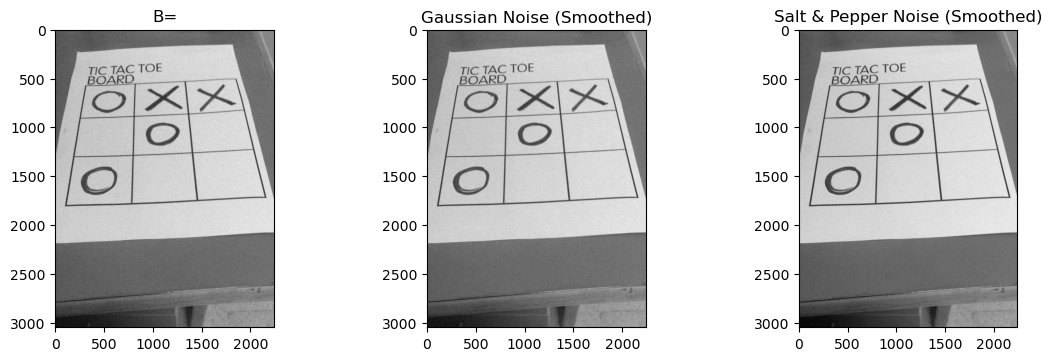

In [26]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 4, 6)
plt.imshow(sm_uni, cmap='gray')
plt.title('B=')

plt.subplot(3, 4, 7)
plt.imshow(sm_gaus, cmap='gray')
plt.title('Gaussian Noise (Smoothed)')

plt.subplot(3, 4, 8)
plt.imshow(sm_sp, cmap='gray')
plt.title('Salt & Pepper Noise (Smoothed)')

plt.tight_layout()
plt.show()